<a href="https://colab.research.google.com/github/LazyHooks/whitecrow/blob/main/product_org_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [2]:
import warnings

warnings.filterwarnings('ignore')

input

In [91]:
df = pd.read_csv("Brand Drivers prod.csv")
df.head()

,Sl. No.,My friends say good things about the company,I can grow my career quickly there,Working there will help me to get to the company of my dreams,The company has good social media reviews,I can earn a lot of money there,I can learn a lot there,It’s an exciting company to work for,I’ll enjoy a good work/life balance there,They’ll offer me my preferred working arrangement (hybrid/virtual/in-office etc.),The company has great employee benefits,Relocation or commute would be easy,The company is committed to diversity and sustainability
0,79,0,3,0,0,4,0,2,5,0,0,0,1
1,80,0,5,0,4,3,0,0,1,0,2,0,0
2,81,0,3,0,5,0,0,2,0,4,1,0,0
3,82,0,2,5,0,0,3,4,0,1,0,0,0
4,83,0,3,0,5,0,2,4,0,0,1,0,0


In [92]:
df = df.drop('Sl. No.', axis = 1)
#df = df.drop('Sub Industry', axis = 1)
df

,My friends say good things about the company,I can grow my career quickly there,Working there will help me to get to the company of my dreams,The company has good social media reviews,I can earn a lot of money there,I can learn a lot there,It’s an exciting company to work for,I’ll enjoy a good work/life balance there,They’ll offer me my preferred working arrangement (hybrid/virtual/in-office etc.),The company has great employee benefits,Relocation or commute would be easy,The company is committed to diversity and sustainability
0,0,3,0,0,4,0,2,5,0,0,0,1
1,0,5,0,4,3,0,0,1,0,2,0,0
2,0,3,0,5,0,0,2,0,4,1,0,0
3,0,2,5,0,0,3,4,0,1,0,0,0
4,0,3,0,5,0,2,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3277,0,3,0,0,5,1,0,4,0,2,0,0
3278,0,2,0,5,1,0,3,0,0,4,0,0
3279,0,5,0,0,0,3,0,2,1,4,0,0
3280,0,3,0,0,1,2,4,5,0,0,0,0


exploratory

In [93]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 12 columns):
 #   Column                                                                             Non-Null Count  Dtype
---  ------                                                                             --------------  -----
 0   My friends say good things about the company                                       3282 non-null   int64
 1   I can grow my career quickly there                                                 3282 non-null   int64
 2   Working there will help me to get to the company of my dreams                      3282 non-null   int64
 3   The company has good social media reviews                                          3282 non-null   int64
 4   I can earn a lot of money there                                                    3282 non-null   int64
 5   I can learn a lot there                                                            3282 non-null   int64
 6   It’s an 

In [94]:
df.isnull().sum()

My friends say good things about the company                                         0
I can grow my career quickly there                                                   0
Working there will help me to get to the company of my dreams                        0
The company has good social media reviews                                            0
I can earn a lot of money there                                                      0
I can learn a lot there                                                              0
It’s an exciting company to work for                                                 0
I’ll enjoy a good work/life balance there                                            0
They’ll offer me my preferred working arrangement (hybrid/virtual/in-office etc.)    0
The company has great employee benefits                                              0
Relocation or commute would be easy                                                  0
The company is committed to diversity and s

checks

In [95]:

df.describe()

,My friends say good things about the company,I can grow my career quickly there,Working there will help me to get to the company of my dreams,The company has good social media reviews,I can earn a lot of money there,I can learn a lot there,It’s an exciting company to work for,I’ll enjoy a good work/life balance there,They’ll offer me my preferred working arrangement (hybrid/virtual/in-office etc.),The company has great employee benefits,Relocation or commute would be easy,The company is committed to diversity and sustainability
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,0.883608,2.108470,0.767824,0.942108,2.245887,2.360756,1.319622,1.396405,0.973796,1.174284,0.386654,0.321146
std,1.745245,1.852154,1.523671,1.722699,1.946446,1.902121,1.685562,1.574453,1.473503,1.614502,1.082449,0.849101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,4.000000,0.000000,1.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [96]:
X=df

Scaling

In [97]:
cols = X.columns

In [98]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [99]:
X = pd.DataFrame(X, columns=[cols])

In [100]:
X.head()

,My friends say good things about the company,I can grow my career quickly there,Working there will help me to get to the company of my dreams,The company has good social media reviews,I can earn a lot of money there,I can learn a lot there,It’s an exciting company to work for,I’ll enjoy a good work/life balance there,They’ll offer me my preferred working arrangement (hybrid/virtual/in-office etc.),The company has great employee benefits,Relocation or commute would be easy,The company is committed to diversity and sustainability
0,0.0,0.6,0.0,0.0,0.8,0.0,0.4,1.0,0.0,0.0,0.0,0.2
1,0.0,1.0,0.0,0.8,0.6,0.0,0.0,0.2,0.0,0.4,0.0,0.0
2,0.0,0.6,0.0,1.0,0.0,0.0,0.4,0.0,0.8,0.2,0.0,0.0
3,0.0,0.4,1.0,0.0,0.0,0.6,0.8,0.0,0.2,0.0,0.0,0.0
4,0.0,0.6,0.0,1.0,0.0,0.4,0.8,0.0,0.0,0.2,0.0,0.0


In [101]:
#X.dropna(inplace=True)
#X

K means

In [102]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [103]:
kmeans.cluster_centers_

array([[0.34831782, 0.19198282, 0.04867573, 0.14674302, 0.41474588,
        0.40386543, 0.1027917 , 0.49878311, 0.22834646, 0.3964209 ,
        0.08962062, 0.10336435],
       [0.04954907, 0.59193634, 0.23129973, 0.21931034, 0.47469496,
        0.52275862, 0.38334218, 0.11660477, 0.16986737, 0.11511936,
        0.06822281, 0.03522546]])

inertia

In [104]:
kmeans.inertia_

3593.961090157194

Elbow

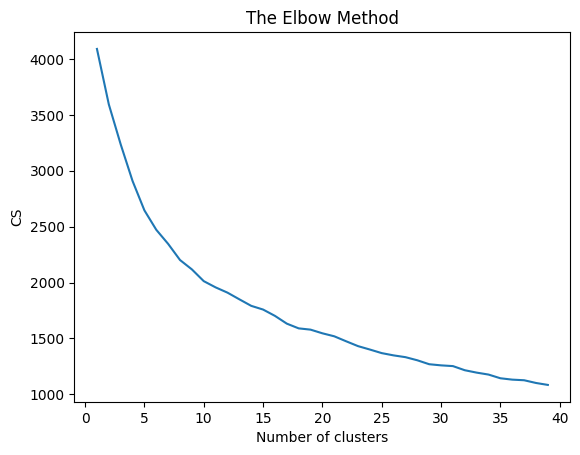

In [105]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

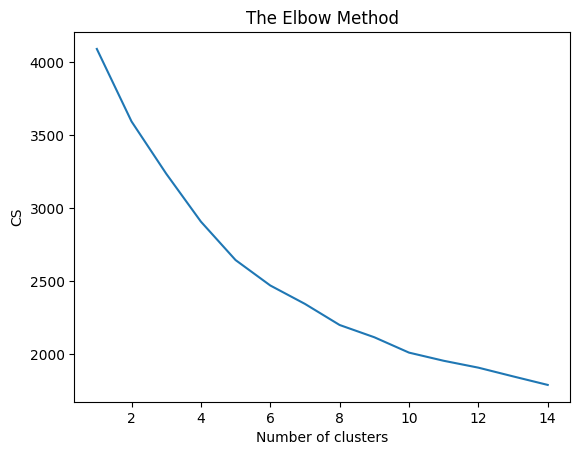

In [106]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [143]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [179]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('prod_pers_6_l.csv')
print(labels)

[1 4 4 ... 5 5 2]


In [145]:
Z=kmeans.cluster_centers_
Z

array([[0.03696203, 0.38886076, 0.85974684, 0.07341772, 0.45924051,
        0.42379747, 0.2764557 , 0.15696203, 0.09822785, 0.10987342,
        0.05873418, 0.03443038],
       [0.02103387, 0.8       , 0.09946524, 0.0342246 , 0.85276292,
        0.38217469, 0.24491979, 0.17254902, 0.19144385, 0.10338681,
        0.0513369 , 0.02816399],
       [0.06395512, 0.10350631, 0.01430575, 0.05553997, 0.50575035,
        0.46171108, 0.05610098, 0.56409537, 0.32482468, 0.56100982,
        0.09901823, 0.15792426],
       [0.95541922, 0.40695297, 0.05562372, 0.11206544, 0.31206544,
        0.3803681 , 0.11451943, 0.28629857, 0.08384458, 0.20204499,
        0.05766871, 0.0192229 ],
       [0.04957627, 0.39618644, 0.08177966, 0.92372881, 0.42457627,
        0.31694915, 0.24449153, 0.16567797, 0.10254237, 0.13771186,
        0.10762712, 0.03347458],
       [0.02668712, 0.49355828, 0.05      , 0.06104294, 0.15460123,
        0.77147239, 0.62607362, 0.2107362 , 0.26380368, 0.16196319,
        0.08006135,

In [146]:
import matplotlib

In [175]:
tsne = TSNE(n_components=2, verbose=1, perplexity=200, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 3282 samples in 0.018s...
[t-SNE] Computed neighbors for 3282 samples in 2.264s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3282
[t-SNE] Computed conditional probabilities for sample 2000 / 3282
[t-SNE] Computed conditional probabilities for sample 3000 / 3282
[t-SNE] Computed conditional probabilities for sample 3282 / 3282
[t-SNE] Mean sigma: 0.520474
[t-SNE] KL divergence after 100 iterations with early exaggeration: 62.403030
[t-SNE] KL divergence after 2500 iterations: 0.721904


In [176]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=int32)

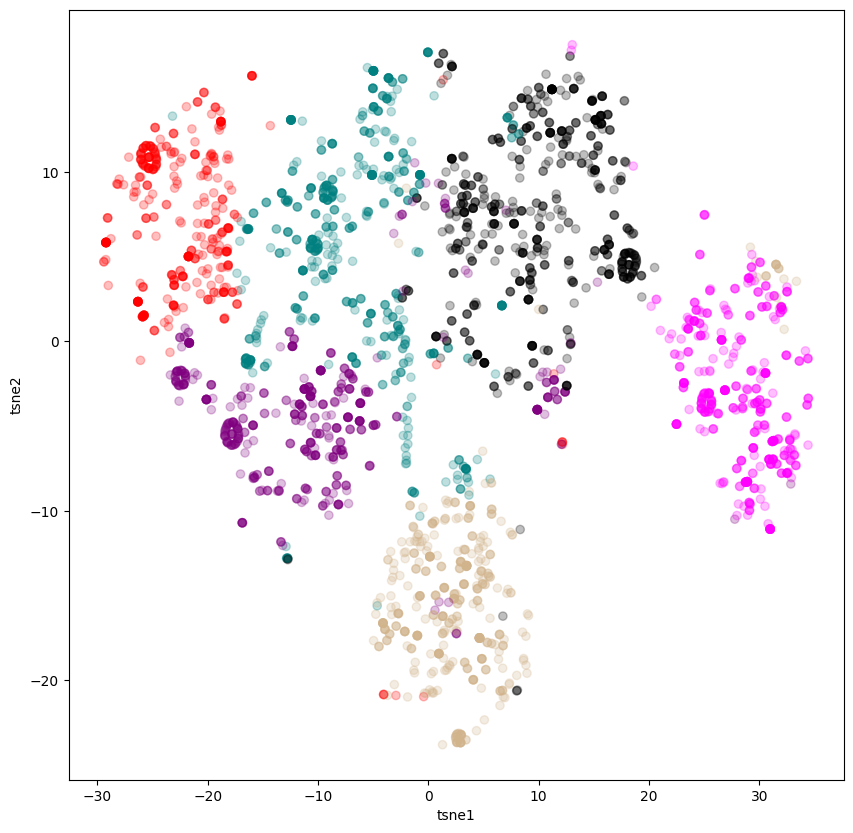

In [177]:
colors = ["red","green","blue","purple","yellow","cyan","black","lime","orange","magenta","darkviolet","gray","tan","khaki","olive","teal"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [180]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('prod_pers_6.csv')
Z2

array([[0.18481013, 1.9443038 , 4.29873418, 0.36708861, 2.29620253,
        2.11898734, 1.38227848, 0.78481013, 0.49113924, 0.54936709,
        0.29367089, 0.1721519 ],
       [0.10516934, 4.        , 0.4973262 , 0.17112299, 4.26381462,
        1.91087344, 1.22459893, 0.8627451 , 0.95721925, 0.51693405,
        0.25668449, 0.14081996],
       [0.3197756 , 0.51753156, 0.07152875, 0.27769986, 2.52875175,
        2.3085554 , 0.28050491, 2.82047686, 1.62412342, 2.80504909,
        0.49509116, 0.78962132],
       [4.77709611, 2.03476483, 0.27811861, 0.5603272 , 1.5603272 ,
        1.90184049, 0.57259714, 1.43149284, 0.4192229 , 1.01022495,
        0.28834356, 0.09611452],
       [0.24788136, 1.9809322 , 0.40889831, 4.61864407, 2.12288136,
        1.58474576, 1.22245763, 0.82838983, 0.51271186, 0.68855932,
        0.53813559, 0.16737288],
       [0.13343558, 2.46779141, 0.25      , 0.30521472, 0.77300613,
        3.85736196, 3.1303681 , 1.05368098, 1.3190184 , 0.80981595,
        0.40030675,